# Carga y manipulación de datos con pandas

_ __pandas es una biblioteca de análisis de datos en Python__ que nos provee de las estructuras de datos y herramientas para realizar análisis de manera rápida. Se articula sobre la biblioteca NumPy y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales que requieren seguir un proceso de carga, limpieza, filtrado, reduccióń y análisis. _

Se trata de una biblioteca muy extensa y que sigue evolucionando, por lo que lleva tiempo conocer todas las posibilidades que ofrece. La mejor forma de aprender `pandas` es usándolo, por lo que ¡nos ahorraremos la introducción e iremos directos al grano!

In [1]:
# Importamos pandas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Cargando los datos y explorándolos

Trabajaremos sobre un fichero de datos metereológicos de la Consejeria Agricultura Pesca y Desarrollo Rural Andalucía.

In [2]:
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

Vemos que los datos no están en formato CSV, sino que la delimitación son espacios. Si intentamos cargarlos con pandas no tendremos mucho éxito:

In [8]:
# Tratamos de cargarlo en pandas
datos=pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/Tabernas.txt")

In [9]:
datos.head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,25-10-18 298 25.5 7.3 15.5 ...
2,24-10-18 297 22.5 8.4 14.8 ...
3,23-10-18 296 20.8 11.8 15.9 ...
4,22-10-18 295 23.3 9.8 16.2 ...


Veamos los datos cargados!!!

Tenemos que hacer los siguientes cambios:

* Separar los campos por un número arbitrario de espacios en blanco.
* Saltar las primeras líneas.
* Dar nombres nuevos a las columnas.
* Descartar la columna del día del año (podemos calcularla luego).
* Parsear las fechas en el formato correcto.

La aproximación clásica a este tipo de problemas es hacer una lectura línea a línea en la que vayamos "parseando" los datos del fichero, de acuerdo al formato que esperamos recibir y nos protejamos cuando, no se cumpla la estructura.

In [10]:
data = pd.read_csv(
    "C:/Users/Andre Chavez/Desktop/Datos/Tabernas.txt",
    delim_whitespace=True,   # delimitado por espacios en blanco
    usecols=(0, 2, 3, 4, 5),  # columnas que queremos usar
    skiprows=2,  # saltar las dos primeras líneas
    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates=['DATE'],
#     date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%y'),  # Parseo manual
    dayfirst=True,  # ¡Importante
    index_col=["DATE"]  # Si queremos indexar por fechas
)

# Ordenando de más antigua a más moderna
data.sort_index(inplace=True)

# Mostrando sólo las primeras o las últimas líneas
data.head()

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2000-01-31,12.5,5.9,7.1,0.0
2000-02-01,22.7,5.2,13.5,0.0
2000-02-02,22.0,6.8,13.2,0.0
2000-02-03,19.7,4.4,11.1,0.0
2000-02-04,18.6,3.4,9.9,0.0


Las fechas también se pueden parsear de manera manual con el argumento:

```
date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%y'),  # Parseo manual
```

<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

In [11]:
# Comprobamos los tipos de datos de la columnas
data.dtypes

TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

In [12]:
# Pedomos información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6844 entries, 2000-01-31 to 2018-10-25
Data columns (total 4 columns):
TMAX      6822 non-null float64
TMIN      6822 non-null float64
TMED      6822 non-null float64
PRECIP    6822 non-null float64
dtypes: float64(4)
memory usage: 267.3 KB


En una dataframe pueden convivir datos de tipo diferente en diferentes columnas: en nuestro caso, fechas (en el índice) y (flotantes en las columnas). El que un dato sea de tipo fecha y no un string u otra cosa, nos permite obtener información como el día de la semana de manera directa:

In [13]:
data.index.dayofweek

Int64Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', name='DATE', length=6844)

Una vez hemos cargado los datos, estamos preparados para analizarlos utilizando toda la artillería de `pandas`. Por ejemplo, puede que queramos una descripción estadística rápida:

In [14]:
# Descripción estadística
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,6822.00000,6822.000000,6822.000000,6822.000000
mean,23.31633,9.861272,16.425726,0.671782
std,7.28708,6.189574,6.591007,3.402350
min,0.00000,-8.200000,-14.900000,0.000000
25%,17.40000,4.800000,10.800000,0.000000
50%,23.00000,9.800000,16.100000,0.000000
75%,29.20000,15.300000,22.200000,0.000000
max,42.60000,26.000000,32.100000,66.200000


## Accediendo a los datos 

### Columnas

Tenemos dos formas de acceder a las columnas: **por nombre** o **por atributo** (si no contienen espacios ni caracteres especiales).

In [15]:
# Accediendo como clave
data['TMAX'].head()

DATE
2000-01-31    12.5
2000-02-01    22.7
2000-02-02    22.0
2000-02-03    19.7
2000-02-04    18.6
Name: TMAX, dtype: float64

In [17]:
# Accediendo como atributo
data.TMIN.head()

DATE
2000-01-31    5.9
2000-02-01    5.2
2000-02-02    6.8
2000-02-03    4.4
2000-02-04    3.4
Name: TMIN, dtype: float64

In [18]:
# Accediendo a varias columnas a la vez
data[['TMAX', 'TMIN']].head()

,TMAX,TMIN
DATE,,
2000-01-31,12.5,5.9
2000-02-01,22.7,5.2
2000-02-02,22.0,6.8
2000-02-03,19.7,4.4
2000-02-04,18.6,3.4


Del mismo modo que accedmos, podemos operar con ellos:

In [19]:
# Modificando valores de columnas
data[['TMAX', 'TMIN']] / 10

,TMAX,TMIN
DATE,,
2000-01-31,1.25,0.59
2000-02-01,2.27,0.52
2000-02-02,2.20,0.68
2000-02-03,1.97,0.44
2000-02-04,1.86,0.34
2000-02-05,1.68,0.15
2000-02-06,1.82,0.17
2000-02-07,2.12,0.39
2000-02-08,2.17,0.62


e introducirlos en funciones:

In [20]:
# Aplicando una función a una columna entera (ej. media numpy)
import numpy as np
np.mean(data.TMAX)

23.31632952213429

In [21]:
# Calculando la media con pandas
data.TMAX.mean()

23.31632952213429

### Filas 

Para acceder a las filas tenemos dos métodos: `.loc` (basado en etiquetas), `.iloc` (basado en posiciones enteras)

In [22]:
# Accediendo a una fila por índice
data.iloc[1]

TMAX      22.7
TMIN       5.2
TMED      13.5
PRECIP     0.0
Name: 2000-02-01 00:00:00, dtype: float64

In [23]:
# Accediendo a una fila por etiqueta
data.loc["2016-09-02"]

TMAX      31.8
TMIN      16.3
TMED      23.2
PRECIP     0.0
Name: 2016-09-02 00:00:00, dtype: float64

Puedo incluso hacer secciones basadas en fechas:

In [24]:
data.loc["2016-12-01":]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-01,13.6,9.2,11.1,3.2
2016-12-02,17.2,5.5,10.8,0.0
2016-12-03,13.4,8.7,11.1,1.0
2016-12-04,11.8,10.1,10.9,23.8
2016-12-05,16.6,7.9,11.7,0.0
2016-12-06,17.7,7.1,13.4,0.0
2016-12-07,15.7,6.1,10.1,0.2
2016-12-08,14.5,5.4,10.4,0.0
2016-12-09,13.6,9.5,11.2,1.8


### Filtrando los datos 

También puedo indexar utilizando arrays de valores booleanos, por ejemplo procedentes de la comprobación de una condición:

In [25]:
# Comprobando que registros carecen de datos válidos
data.TMIN.isnull().head()

DATE
2000-01-31    False
2000-02-01    False
2000-02-02    False
2000-02-03    False
2000-02-04    False
Name: TMIN, dtype: bool

In [26]:
# Accediendo a los registros que cumplen una condición
data.loc[data.TMIN.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2000-12-19,NaN,NaN,NaN,NaN
2002-05-12,NaN,NaN,NaN,NaN
2002-05-13,NaN,NaN,NaN,NaN
2005-08-21,NaN,NaN,NaN,NaN
2005-12-22,NaN,NaN,NaN,NaN
2006-01-28,NaN,NaN,NaN,NaN
2006-02-16,NaN,NaN,NaN,NaN
2006-05-11,NaN,NaN,NaN,NaN
2006-06-14,NaN,NaN,NaN,NaN


In [27]:
# Valores de precipitación por encima de la media:
print(data.PRECIP.mean())
data[data.PRECIP > data.PRECIP.mean()]

0.6717824684843057


,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2000-03-13,20.3,6.0,11.8,5.2
2000-03-25,18.6,6.0,11.2,3.4
2000-04-02,16.6,7.4,11.9,3.6
2000-04-08,17.5,8.8,12.2,2.4
2000-04-16,17.7,10.6,14.0,8.6
2000-05-01,15.9,9.4,12.7,3.8
2000-05-05,20.8,11.1,15.4,20.8
2000-05-06,19.1,10.3,14.0,1.2
2000-05-08,19.0,12.1,15.1,3.8


### Funciones "rolling" 

Por último, pandas proporciona métodos para calcular magnitudes como medias móviles usando el método `rolling`:

In [28]:
# Calcular la media de la columna TMAX
data.TMAX.head(15)

DATE
2000-01-31    12.5
2000-02-01    22.7
2000-02-02    22.0
2000-02-03    19.7
2000-02-04    18.6
2000-02-05    16.8
2000-02-06    18.2
2000-02-07    21.2
2000-02-08    21.7
2000-02-09    22.3
2000-02-10    17.9
2000-02-11    19.8
2000-02-12    19.4
2000-02-13    15.9
2000-02-14    22.9
Name: TMAX, dtype: float64

In [30]:
# Media trimensual centrada
data.TMAX.rolling(5, center=True).mean().head(15)

DATE
2000-01-31      NaN
2000-02-01      NaN
2000-02-02    19.10
2000-02-03    19.96
2000-02-04    19.06
2000-02-05    18.90
2000-02-06    19.30
2000-02-07    20.04
2000-02-08    20.26
2000-02-09    20.58
2000-02-10    20.22
2000-02-11    19.06
2000-02-12    19.18
2000-02-13    19.90
2000-02-14    20.40
Name: TMAX, dtype: float64

### Creación de nuevas columnas 

In [31]:
# Agruparemos por año y día: creemos dos columnas nuevas
data['year'] = data.index.year
data['month'] = data.index.month

## Creando agrupaciones 

En muchas ocasiones queremos realizar agrupaciones de datos en base a determinados valores como son fechas, o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar)

Podemos agrupar nuestros datos utilizando `groupby`:

In [33]:
# Creamos la agrupación
monthly = data.groupby(by=['year', 'month'])

In [34]:
# Podemos ver los grupos que se han creado
monthly.groups.keys()

dict_keys([(2000, 1), (2000, 2), (2000, 3), (2000, 4), (2000, 5), (2000, 6), (2000, 7), (2000, 8), (2000, 9), (2000, 10), (2000, 11), (2000, 12), (2001, 1), (2001, 2), (2001, 3), (2001, 4), (2001, 5), (2001, 6), (2001, 7), (2001, 8), (2001, 9), (2001, 10), (2001, 11), (2001, 12), (2002, 1), (2002, 2), (2002, 3), (2002, 4), (2002, 5), (2002, 6), (2002, 7), (2002, 8), (2002, 9), (2002, 10), (2002, 11), (2002, 12), (2003, 1), (2003, 2), (2003, 3), (2003, 4), (2003, 5), (2003, 6), (2003, 7), (2003, 8), (2003, 9), (2003, 10), (2003, 11), (2003, 12), (2004, 1), (2004, 2), (2004, 3), (2004, 4), (2004, 5), (2004, 6), (2004, 7), (2004, 8), (2004, 9), (2004, 10), (2004, 11), (2004, 12), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2005, 5), (2005, 6), (2005, 7), (2005, 8), (2005, 9), (2005, 10), (2005, 11), (2005, 12), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2006, 5), (2006, 6), (2006, 7), (2006, 8), (2006, 9), (2006, 10), (2006, 11), (2006, 12), (2007, 1), (2007, 2), (2007, 3), (2007, 4), 

Con estos grupos podemos hacer hacer varias cosas:

* Acceder a sus datos individualmente (por ejemplo, comprobar qué pasó cada día de marzo de 2016) 
* Realizar una reducción de datos, para comparar diversos grupos (por, ejemplo caracterizar el tiempo de cada mes a lo largo de los años)

In [35]:
# Accedemos a un grupo
monthly.get_group((2016,3)).head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [36]:
# Hhacemos una agregación de los datos:
monthly_mean = monthly.mean()
monthly_mean.head(24)

TMAX       TMIN       TMED    PRECIP
year month                                           
2000 1      12.500000   5.900000   7.100000  0.000000
     2      19.541379   4.727586  11.668966  0.013793
     3      19.841935   5.403226  12.270968  0.277419
     4      20.776667   7.676667  14.500000  0.493333
     5      24.787097  12.351613  18.580645  1.703226
     6      29.783333  15.480000  22.690000  0.000000
     7      33.141935  17.580645  25.364516  0.000000
     8      33.319355  17.870968  25.538710  0.000000
     9      28.886667  14.853333  21.563333  0.206667
     10     23.138710  10.261290  16.367742  4.141935
     11     17.996667   6.250000  12.016667  0.226667
     12     16.430000   5.026667  10.293333  1.126667
2001 1      16.487097   4.177419  10.238710  0.490323
     2      17.321429   3.960714  10.264286  0.364286
     3      22.587097   8.264516  15.629032  0.070968
     4      22.356667   8.223333  15.576667  0.260000
     5      23.929032  10.958065  17.754839  1.116129
     6      31.790000  16.390000  24.386667  0.000000
     7      32.625806  17.622581  25.419355  0.000000
     8      33.129032  18.519355  25.835484  0.135484
     9      27.740000  15.880000  21.486667  0.260000
     10     24.948387  12.980645  18.632258  1.451613
     11     15.580000   5.636667  10.456667  1.226667
     12     13.535484   3.841935   8.309677  1.574194

### Creando agrupaciones 

En ocasiones podemos querer ver nuestros datos de forma diferente o necesitamos organizarlos así para utilizar determinadas funciones de `pandas`. Una necesidad típica es la de pivotar una tabla.

    Imagina que queremos acceder a los mismos datos que en el caso anterior, pero que ahora queremos ver los años en las filas y para cada variable (TMAX, TMED...) los calores de cada mes en una columna. ¿Cómo lo harías?

In [37]:
# Dejar los años como índices y ver la media mensual en cada columna
monthly_mean.reset_index().pivot(index='year', columns='month')

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2000   12.500000  19.541379  19.841935  20.776667  24.787097  29.783333   
2001   16.487097  17.321429  22.587097  22.356667  23.929032  31.790000   
2002   15.116129  18.489286  18.138710  19.900000  24.479310  29.903333   
2003   14.938710  13.921429  17.780645  21.123333  25.012903  32.353333   
2004   17.567742  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   
2017   13.819355  16.282143  19.312903  20.913333  25.903226  31.603333   
2018   16.054839  15.032143  17.583871  20.676667  23.474194  28.756667   

                                                     ...       PRECIP  \
month         7          8          9          10    ...           3    
year                                                 ...                
2000   33.141935  33.319355  28.886667  23.138710    ...     0.277419   
2001   32.625806  33.129032  27.740000  24.948387    ...     0.070968   
2002   31.358065  31.303226  28.273333  24.422581    ...     1.696774   
2003   34.787097  33.922581  28.030000  21.951613    ...     0.445161   
2004   31.664516  33.483871  30.066667  26.022581    ...     2.619355   
2005   33.445161  32.193333  27.803333  23.900000    ...     0.858065   
2006   33.900000  31.990323  28.633333  25.483871    ...     0.070968   
2007   32.551613  31.764516  26.806667  21.919355    ...     0.625806   
2008   32.596774  32.380645  27.343333  21.548387    ...     0.464516   
2009   34.964516  32.367742  26.363333  25.945161    ...     1.425806   
2010   33.070968  33.067742  28.726667  23.980645    ...     2.548387   
2011   32.977419  33.687097  28.870000  24.216129    ...     1.012903   
2012   32.880645  35.754545  28.106667  23.506452    ...     0.025806   
2013   31.841935  31.716129  28.016667  26.603226    ...     1.141935   
2014   32.154839  32.645161  29.603333  25.287097    ...     0.122581   
2015   35.174194  32.203226  27.966667  23.664516    ...     1.374194   
2016   32.180645  30.929032  29.016667  24.567742    ...     0.167742   
2017   33.358065  31.670968  28.520000  25.319355    ...     1.774194   
2018   33.283871  32.296774  28.326667  23.052000    ...     1.135484   

                                                                             \
month        4         5         6         7         8         9         10   
year                                                                          
2000   0.493333  1.703226  0.000000  0.000000  0.000000  0.206667  4.141935   
2001   0.260000  1.116129  0.000000  0.000000  0.135484  0.260000  1.451613   
2002   2.293333  0.331034  0.286667  0.006452  0.270968  0.380000  0.148387   
2003   0.406667  0.670968  0.020000  0.000000  0.000000  0.166667  2.522581   
2004   3.233333  1.019355  0.206667  0.006452  0.000000  0.020000  0.122581   
2005   0.073333  0.109677  0.033333  0.000000  0.040000  0.553333  0.187097   
2006   1.960000  2.026667  0.351724  0.0000

La línea anterior no es sencilla y no se escribe de una sola vez sin errores (sobre todo si estás empezando). Esto es una ejemplo de que `pandas` es una librería potente, pero que lleva tiempo aprender. Pasarás muchas horas peleando contra problemas de este tipo, pero afortunadamente mucha gente lo ha pasado mal antes y su experiencia ha quedado plasmada en cientos de **preguntas de `stack overflow`** y en la **documentación de `pandas`**

## Plotting

## Líneas

Text(0.5,1,'Temperaturas')

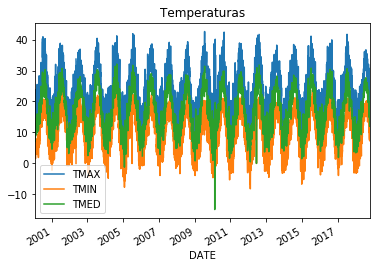

In [38]:
# Pintar la temperatura máx, min, med
data.plot(y=["TMAX", "TMIN", "TMED"])
plt.title('Temperaturas')

## Cajas

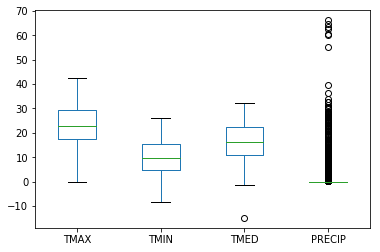

In [39]:
data.loc[:, 'TMAX':'PRECIP'].plot.box()

## Pintando los datos de un "típíco día `d` del mes `m` del año `a`

Pintando la temperatura máxima de las máximas, mínima de las mínimas, media de las medias para cada día del año de los años disponnibles

In [40]:
group_daily = data.groupby(['month', data.index.day])

daily_agg = group_daily.agg({'TMED': 'mean', 'TMAX': 'max', 'TMIN': 'min', 'PRECIP': 'mean'})
daily_agg.head()

TMED  TMAX  TMIN    PRECIP
month DATE                                
1     1     9.227778  21.0  -1.6  0.077778
      2     9.461111  22.9  -3.0  0.044444
      3     9.033333  23.3  -1.6  0.555556
      4     9.488889  23.7  -0.6  0.300000
      5     9.072222  21.7  -1.0  0.500000

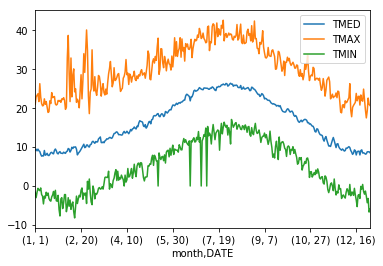

In [41]:
daily_agg.plot(y=['TMED', 'TMAX', 'TMIN'])

## Visualizaciones especiales

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


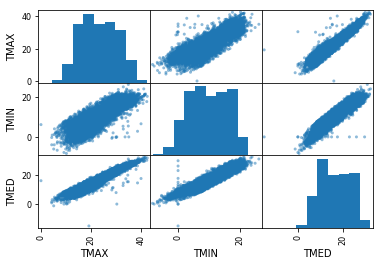

In [42]:
# scatter_matrix
from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

Algunos enlaces:

* A visual guide to pandas: https://www.youtube.com/watch?v=9d5-Ti6onew
* Pandas cheatsheet (oficial): https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* Pandas Datacamp cheatsheet: https://www.datacamp.com/community/blog/python-pandas-cheat-sheet#gs.eyIEEEg
* Consejos de rendimiento: http://slides.com/jeffreback/pfq-performance-pandas#/
